# Importing Libraries

In [2]:
from functions.adversarial import *
from functions.dip import *
from functions.classification import *
import matplotlib.pyplot as plt
import cv2
import numpy as np
from functions.utils import *

#device = torch.device("cuda" if torch.cuda.device_count() else "cpu")

tensor([[[[2.6802e-04, 2.0000e-02, 7.5575e-02,  ..., 4.9371e-02,
           2.5716e-02, 2.8886e-02],
          [5.5896e-02, 5.9683e-02, 4.9387e-02,  ..., 5.2216e-02,
           1.7360e-02, 1.0781e-02],
          [1.9650e-02, 7.8943e-02, 2.4010e-02,  ..., 9.2337e-02,
           4.9352e-02, 7.4834e-02],
          ...,
          [6.9928e-02, 5.4096e-02, 5.2072e-02,  ..., 5.1654e-02,
           8.7596e-02, 5.7591e-02],
          [2.3728e-03, 8.6956e-03, 9.8613e-02,  ..., 7.6034e-02,
           4.0431e-02, 5.9519e-02],
          [4.0020e-02, 5.5520e-03, 7.1264e-02,  ..., 7.8711e-02,
           6.4325e-02, 9.2023e-02]],

         [[4.0980e-02, 2.5666e-02, 7.7285e-03,  ..., 8.1084e-02,
           6.4419e-02, 2.6315e-02],
          [7.4522e-02, 8.9393e-02, 8.9915e-02,  ..., 3.3687e-04,
           5.4806e-02, 4.9030e-02],
          [7.6289e-02, 6.6012e-02, 6.1110e-02,  ..., 8.9125e-02,
           2.0987e-02, 9.2936e-02],
          ...,
          [4.1558e-02, 2.3202e-02, 2.9123e-02,  ..., 1.4280

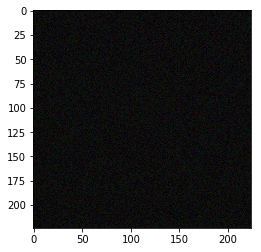

In [3]:
net_input = get_noise(3, 'noise', (224, 224))
print(net_input)
print(net_input.shape)
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()
last_net = 
net_input = global_values.net_input_saved + (global_values.noise.normal_() * global_values.noise_std)

# Fast Gradient Descent Method

In [ ]:
adv1, orig, pert = adversarial_examples('data/goldfish.jpg', method='FGSM',eps=100,show=False)

# Basic Iterative Method

In [ ]:
adv2, orig, pert = adversarial_examples('data/goldfish.jpg',method='BI',eps=100,show=False)

# Least Likely Class Iterative

In [ ]:
adv3, orig, pert = adversarial_examples('data/goldfish.jpg',method='LLCI',eps=100,show=False)

## Some plotting

In [ ]:
fig=plt.figure(figsize=(16,16))

fig.add_subplot(1, 3, 1)
plt.title('FGSM')
plt.imshow(adv1)

fig.add_subplot(1, 3, 2)
plt.title('BI')
plt.imshow(adv2)

fig.add_subplot(1, 3, 3)
plt.title('LLCI')
plt.imshow(adv3)

plt.show()

## Save images
plt.imsave("results/Goldfish_fgsm_eps100.png", adv1, format="png")
plt.imsave("results/Goldfish_bi_eps100.png", adv2, format="png")
plt.imsave("results/Goldfish_llci_eps100.png", adv3, format="png")

# Using Deep Image Prior

In [ ]:
orig = cv2.imread("data/lighthouse.jpg")[..., ::-1]
orig = cv2.resize(orig, (256, 256))
img = orig.copy().astype(np.float32)

## Save images
#plt.imsave("results/F16_noisy.png", np.clip(img_noisy, 0, 1), format="png")
#plt.imsave("results/F16.png", np.clip(img, 0, 1), format="png")

dip_out = dip(img, num_iter=10001, save=False, plot=False, save_path='results/Adv_DIP/', arch='complex')

# Observing general images

In [ ]:
i=20
orig = cv2.imread("results/Adv_DIP/FGSM_eps100/it_{}.png".format(i*100))[..., ::-1]
orig = cv2.resize(orig, (256, 256))
img = orig.copy().astype(np.float32)
P,R = classification(img)
plt.imshow(orig) 

In [ ]:
std = 150
value = 100

adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='FGSM',eps=value, show=False)
adv_noisy = adv + std*np.random.randn(224,224,3)
adv_noisy = np.clip(adv_noisy,0,255).astype(np.uint8)
plt.imshow(adv_noisy)
plt.show()

In [ ]:
it_300 = cv2.imread("results/Adv_DIP/LLCI_eps5/it_{}.png".format(300))[..., ::-1]
it_1200 = cv2.imread("results/Adv_DIP/LLCI_eps5/it_{}.png".format(1200))[..., ::-1]
it_2500 = cv2.imread("results/Adv_DIP/LLCI_eps5/it_{}.png".format(5000))[..., ::-1]
orig = cv2.imread('data/panda.jpg')[...,::-1]

P,R = classification(orig)
P,R = classification(it_300)
P,R = classification(it_1200)
P,R = classification(it_2500)

## Classifying

In [ ]:
# Find original classification class
iterations = 9101
#adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='LLCI',eps=100, show=False)
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]

# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])


for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/Complex_LLCI_eps5/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  

In [ ]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/Simple_LLCI_eps5/Graph_Complex_LLCI_eps100_full.png')
np.savetxt('results/Adv_DIP/Simple_LLCI_eps5/Complex_LLCI_eps100_full.txt', Confidence)
np.savetxt('results/Adv_DIP/Simple_LLCI_eps5/Complex_LLCI_eps100_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

Number of params: 20355
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


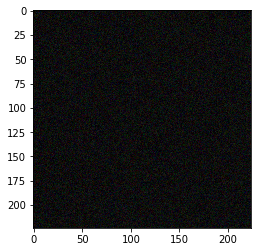

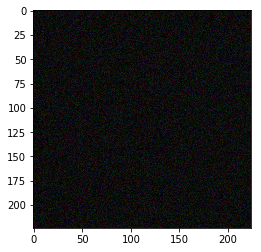

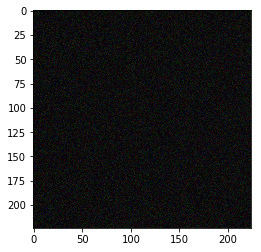

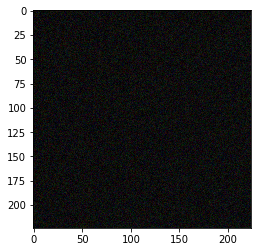

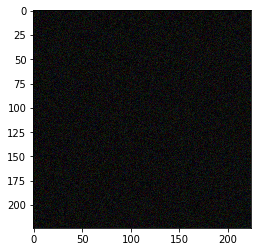

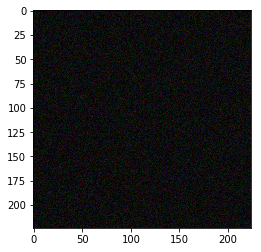

> c:\users\andreas\documents\university of cambridge - engineering\engineering iib\4th year project\vi. code\interpretability\functions\dip.py(170)closure()
    168         if iter_value == 5:
    169             set_trace()
--> 170         return total_loss
    171 
    172     p = get_params(OPT_OVER, net, net_input)

ipdb> global_values.last_net
OrderedDict([('1.1.0.weight', tensor([[[[ 0.0847, -0.0111,  0.0268],
          [-0.0274, -0.0435, -0.1100],
          [ 0.0023,  0.0211, -0.1884]],

         [[ 0.1101, -0.0883,  0.0288],
          [ 0.0726,  0.1016, -0.2150],
          [ 0.1931,  0.1693,  0.1269]],

         [[ 0.1061, -0.1734, -0.0780],
          [-0.1675,  0.0330,  0.0713],
          [-0.0528,  0.1374,  0.0635]]],


        [[[-0.1655,  0.1596, -0.0197],
          [-0.0605,  0.0237,  0.0895],
          [ 0.0898, -0.1137,  0.0461]],

         [[-0.0202, -0.1699, -0.1595],
          [ 0.1493, -0.1576, -0.0451],
          [-0.0419,  0.1038, -0.1286]],

         [[ 0.1699,  0

         [[ 0.1389]]]])), ('9.0.bias', tensor([-0.0181,  0.1587, -0.0630]))])
ipdb> global_values.last_net.shape
*** AttributeError: 'collections.OrderedDict' object has no attribute 'shape'
ipdb> global_values.last_net.size
*** AttributeError: 'collections.OrderedDict' object has no attribute 'size'
ipdb> global_values.net.state_dict
*** AttributeError: type object 'global_values' has no attribute 'net'
ipdb> net.state_dict()#
OrderedDict([('1.1.0.weight', tensor([[[[ 0.0847, -0.0111,  0.0268],
          [-0.0274, -0.0435, -0.1100],
          [ 0.0023,  0.0211, -0.1884]],

         [[ 0.1101, -0.0883,  0.0288],
          [ 0.0726,  0.1016, -0.2150],
          [ 0.1931,  0.1693,  0.1269]],

         [[ 0.1061, -0.1734, -0.0780],
          [-0.1675,  0.0330,  0.0713],
          [-0.0528,  0.1374,  0.0635]]],


        [[[-0.1655,  0.1596, -0.0197],
          [-0.0605,  0.0237,  0.0895],
          [ 0.0898, -0.1137,  0.0461]],

         [[-0.0202, -0.1699, -0.1595],
          [ 0.1493, -

         [[ 0.1389]]]])), ('9.0.bias', tensor([-0.0181,  0.1587, -0.0630]))])
ipdb> net.state_dict().data
*** AttributeError: 'collections.OrderedDict' object has no attribute 'data'
ipdb> import copy
ipdb> global_values.last_net=copy.deepcopy(net)
ipdb> global_values.last_net.type
<bound method Module.type of Sequential(
  (1): Sequential(
    (1): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.2, inplace)
    (4): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2, inplace)
    (7): Sequential(
      (1): Sequential(
        (1): Sequential(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (2): Bat

         [[ 0.1389]]]])), ('9.0.bias', tensor([-0.0181,  0.1587, -0.0630]))])
ipdb> exit


BdbQuit: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
#import argparse
import numpy as np
from functions.utils import *
from functions.adversarial import *
from functions.dip import *
from functions.classification import *
import torch

images = ['panda.jpg']    #,'peacock.jpg','F16_GT.png','monkey.jpg','zebra_GT.png']
for i in images:
    adv, orig, pert = adversarial_examples("data/{}".format(i), method = "FGSM", eps=1, show=False)
    out = dip(adv, num_iter=51, save=False, plot=True, save_path='results/Adv_DIP/{}'.format(i), arch='simple')